<a href="https://colab.research.google.com/github/gcv-silva/Anotacoes-da-IC/blob/main/an%C3%A1lise_exploratoria_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

## **Anotações do Programa de Iniciação Científica e Mestrado | PICME-UEL.**
### *Ligado ao Programa de Pós-Graduação em Matemática Aplicada e Computacional | PGMAC-UEL.*

<br>

### **Aluno (bolsista):** Gustavo Correa Vieira Silva; **Orientador:** Prof. Dr. Rodrigo Rossetto Pescim.

<br>

### **Livros Utilizados:**
1. MORETTIN, Pedro Alberto; BUSSAB, Wilton de Oliveira. *Estatística Básica*. 6. ed. São Paulo: Saraiva, 2010.
2. MORETTIN, Pedro Alberto; SINGER, Julio Marcos. *Estatística e Ciência de Dados*. São Paulo, abril de 2021.
3. CASTANHEIRA, Nelson Pereira. *Estatística aplicada a todos os níveis*. Curitiba: Ibpex, 2008.
4. ASSIS, Janilson Pinheiro de; SOUSA, Roberto Pequeno de; DIAS, Carlos Tadeu dos Santos. *Glossário de estatística*. Mossoró: EdUFERSA, 2019. <br>

### **Cursos Complementares:**
1. SANTOS, Rafael Fernandes Vieira Correia. *Estatística Descritiva com Python*. Disponível em: https://www.udemy.com/course/estatistica-descritiva-com-python/

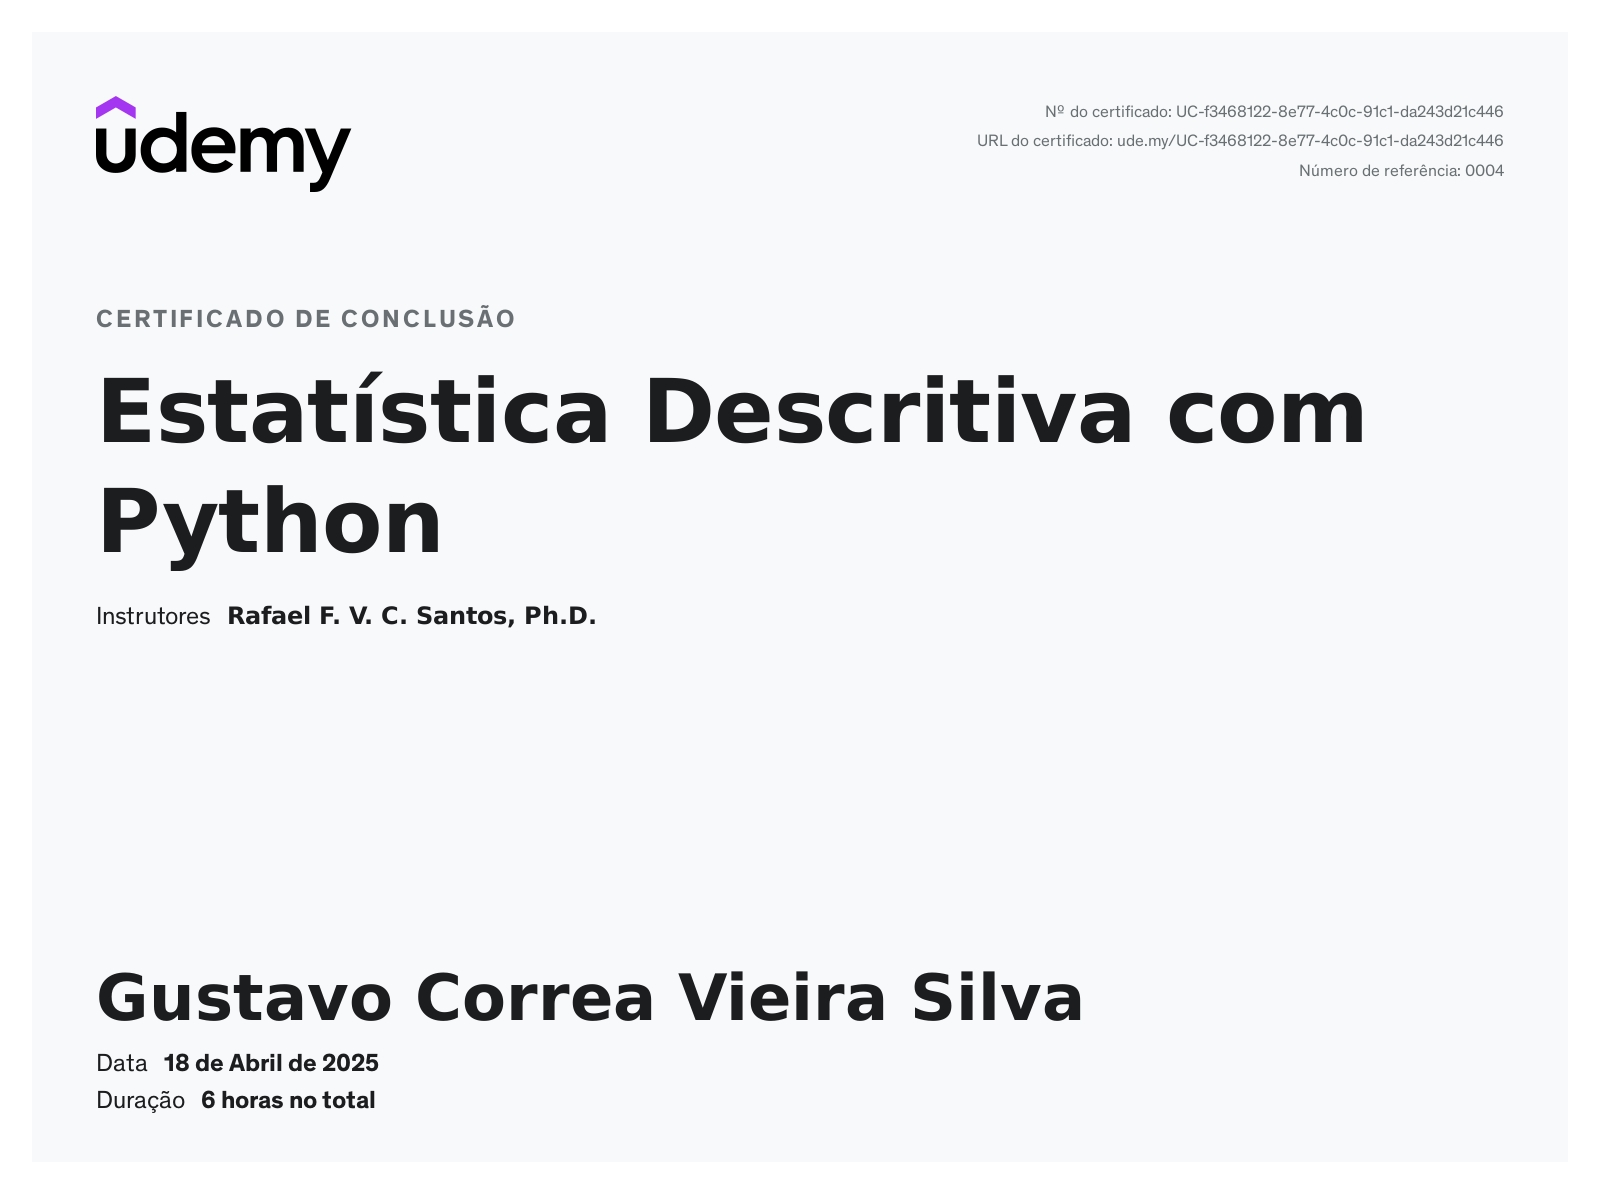

In [82]:
import cv2
from google.colab.patches import cv2_imshow

def imagem(caminho):
  imagem = cv2.imread(caminho)
  cv2_imshow(imagem)

# Meu certificado do curso
imagem('/content/certificado.jpg')

In [83]:
# Demais importações
!pip install bokeh_sampledata
from bokeh_sampledata.iris import flowers as dados_flores

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Afinal, o que é Estatística?**

## Inicialmente, vamos conhecer alguns conceitos que fundamentam nossos estudos.

<br>

### Com base no glossário, define-se *Estatística* como:
> **ESTATÍSTICA:** *A ciência de coletar, analisar, interpretar e retirar conclusões a partir de dados.* <br><br> (ASSIS; SOUSA; DIAS, p. 258).

<br>

### Na introdução do livro 1, é enunciado algo semelhante em relação à *Inferência Estatística*:
> *A **inferência estatística** é uma das partes da Estatística. Esta é a parte da metodologia da Ciência que tem por objetivo a coleta, redução, análise e modelagem dos dados, a partir do que, finalmente, faz-se a inferência para uma população da qual os dados (a amostra) foram obtidos. Um aspecto importante da modelagem dos dados é fazer previsões, a partir das quais se podem tomar decisões.* <br><br> (MORETTIN; BUSSAB, p. 1).

<br>

### Ainda, no segundo capítulo do livro 2, podemos ter uma melhor compreensão sobre o que é a *Inferência Estatística*. Também é incluído um novo termo, a *Análise Exploratória de Dados*:
> *O ramo da Estatística conhecido como **Análise Exploratória de Dados** se ocupa da organização e resumo dos dados de uma amostra ou, eventualmente, de toda a população e o ramo conhecido como **Inferência Estatística** se refere ao processo de se tirar conclusões sobre uma população com base em uma amostra dela.* <br><br> (MORETTIN; SINGER, p. 23 e 24).

<br>

### Já em relação a *Estatística Descritiva*, gostaria de transcrever uma dentre várias definições presentes no glossário (escolhida pela semelhança com a noção apresentada no livro 3):
> **ESTATÍSTICA DESCRITIVA:** *Estatística descritiva refere-se a um conjunto de conceitos e métodos usados na organização, resumo, tabulação, representação e descrição de uma coleção de dados. O objetivo da estatística descritiva é fornecer uma representação dos dados que descrevem em forma numérica, gráfica ou tabular os resultados de pesquisa.* <br><br> (ASSIS; SOUSA; DIAS, p. 310).

<br>

### Veja que cada termo possuí uma forte relação com os demais. Assim, a primeira vista, é muito fácil gerar certa confusão e, por esse motivo, vou tentar explicá-los com minhas palavras.

<br>

### Acima de tudo, estamos ingressando na *Estatística*, uma Ciência própria que ocupa-se com a coleta, organização, análise, apresentação e modelagem de dados. Essas são algumas de suas fases (que podem variar dependendo do autor), e o nosso objetivo principal será fazer uso da *inferência estatística* a fim de inferir/conhecer/compreender aspectos de uma população (conjunto total dos dados da pesquisa) a partir de alguma amostra (subconjunto da população).

<br>

### Conforme prosseguir com a leitura das anotações, tão logo perceberá que o nosso foco inicial será a *Análise Exploratória de Dados*, que consiste no conjunto de técnicas estatísticas e gráficas utilizadas para entender as principais características dos dados, identificar padrões, encontrar anomalias (outliers), criar hipóteses, etc. Nela, incluí-se a *Estatística Descritiva*, ou o conjunto de técnicas destinadas a resumos numéricos (ex.: média) e gráficos diretos (ex.: histograma).

<br>

### Assim sendo, dada uma população do nosso interesse, geralmente utilizamos técnicas de amostragem para obtermos parte dos seus dados, a menos que já seja viável estudar a população como um todo. Daí, com essa amostra, é feita uma análise geral dos dados $-$ etapa onde surge a Análise Exploratória dos Dados $-$ para, enfim, podermos realizar a inferência estatística, "encerrando" finalmente o processo da pesquisa (passível de reavaliação).

<br>

### Veja a seguir um diagrama retirado da apresentação "ANÁLISE EXPLORATÓRIA E ESTATÍSTICA DESCRITIVA" (2012), do Instituto de Ciências Matemáticas e de Computação (ICMC-USP). Disponível em: http://wiki.icmc.usp.br/images/f/f3/Estatisticadescritiva2012.pdf

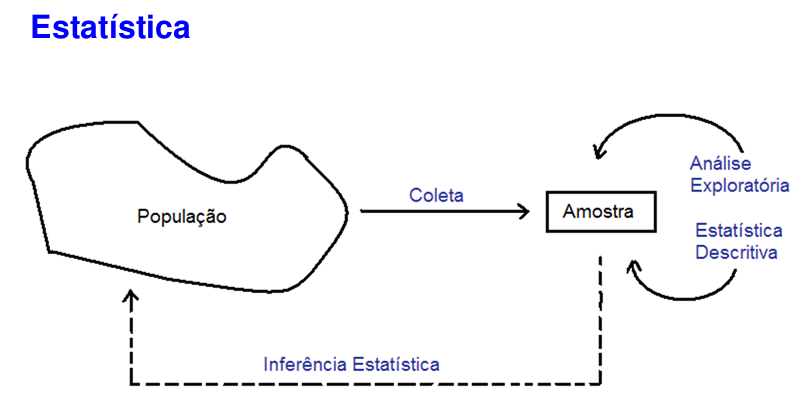

In [84]:
imagem('/content/diagrama.png') # Diagrama exibido na página 4

# **Tipos de Variáveis**

## Vamos admitir que tenha sido feita uma coleta de dados. Que tipos eles poderiam representar?

<br>

### Primeiramente, para fins de objetividade, usualmente vou definir alguns conceitos com minhas próprias palavras, mas, claro, sem perder o rigor. Isso será perceptível, pois não haverá referência explícita. (❗)

<br>

### Continuando, as variáveis $-$ quaisquer características de interesse da pesquisa associadas aos elementos de uma população $-$ podem ser de 2 tipos gerais:

<br>

1. *Variáveis Qualitativas*:
>  **VARIÁVEL QUALITATIVA:** *Variável de natureza analítica definida em termos de seus atributos, portanto não são mensuráveis, nem numéricas ou não contáveis, apenas são descritas, sendo o a condição qualitativa definida por escala. Conhecida também como **variável categórica**.* <br><br> (ASSIS; SOUSA; DIAS, p. 756).

#### Ex.: Sexo, educação, estado civil, etc.
#### As variáveis qualitativas podem ser subdivididas em *nominais* ou *ordinais*. A segunda diferencia-se pela existência de uma relação de ordem entre os resultados. A educação, por exemplo, é um caso em que os ensinos fundamental, médio e superior correspondem a uma ordenação definida pelo grau de instrução.

<br>

2. *Variáveis Quantitativas*:
>  **VARIÁVEL QUANTITATIVA:** *Quando os dados são de caráter nitidamente quantitativo, e o conjunto dos resultados possui uma estrutura numérica, trata-se, portanto da estatística de variável.* <br><br> (ASSIS; SOUSA; DIAS, p. 759).

#### Ex.: Número de filhos, salário, idade, etc.
#### Paralelamente, as variáveis quantitativas podem ser subdivididas em *discretas* ou *contínuas*. A grosso modo, os valores da primeira pertencem a $\mathbb{Z}$ (ex.: idade), enquanto o da segunda pertencem a $\mathbb{R}$ (ex.: salário).

<br>

### Em síntese, temos o seguinte esquema (recortado do livro 1):

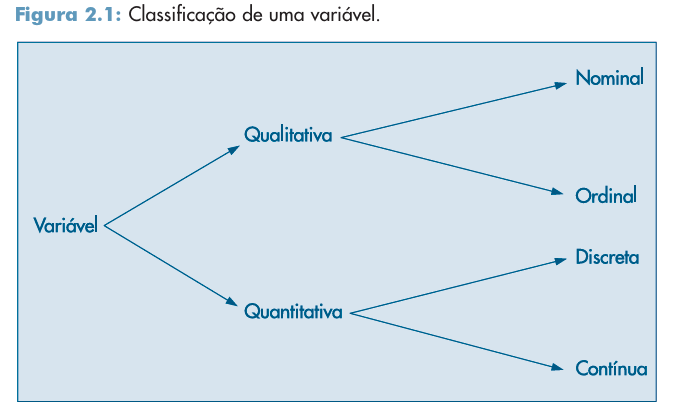

In [85]:
imagem("/content/figura2_1.png") # (MORETTIN; BUSSAB, p. 10).

# **Dados Brutos e Rol**

## Após a coleta dos dados, quais são as primeiras impressões podemos obter sobre eles?

<br>

### Segundo o glossário, define-se *Dados Brutos* como:
> **DADOS BRUTOS**: *Dados na forma em que foram coletados, sem nenhum tratamento, ordenamento ou qualquer tipo de organização.* <br><br> (ASSIS; SOUSA; DIAS, p. 165).

In [86]:
# Exemplo de Dados Brutos
# Supõe-se que os dados a seguir sejam as notas dos alunos da turma X
notas = [random.randint(0, 10) for i in range(30)]
print(notas)

[7, 6, 2, 9, 6, 6, 5, 8, 0, 7, 1, 3, 1, 2, 4, 0, 5, 1, 8, 1, 7, 6, 10, 6, 2, 8, 8, 8, 0, 2]


<br>

### De igual modo, o glossário também a define o conceito de *Rol*:
> **ROL**: *É o arranjo dos dados brutos em ordem de frequência crescente ou decrescente.* <br><br> (ASSIS; SOUSA; DIAS, p. 624).

In [87]:
# Exemplo de Rol
notas.sort()
print(notas)

[0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 9, 10]


<br>

### Percebe-se, portanto, que nada podemos concluir sobre os dados em seu estado bruto. Contudo, quando ordenamos ($↪$ Rol), somos capazes de descobrir quais seriam os valores máximos e mínimos (tratando-se de variáveis quantitativas), tal qual uma noção da distribuição de frequências dos dados.

# **Distribuição de Frequências, Tabelas e outros conceitos**

## Nesse tópico, vamos aprender a construir e identificar tabelas estatísticas.

<br>

### Antes de tudo, vamos definir o que é *Frequência*:
> *A **frequência** é o número de vezes que um valor aparece em um conjunto de dados. Ela pode ser **absoluta**, que é a contagem do número de vezes que cada valor ocorre, ou **relativa**, que é a proporção que cada valor representa em relação ao total.*

In [88]:
# Exemplo de Frequência
# Vamos usar o mesmo contexto das notas dos alunos da turma X
contador = 0

for i in notas:
  if i == 7:
    contador += 1

proporcao = contador/len(notas)
proporcao = round(proporcao, 2)

print(
    f'A nota sete aparece {contador} vezes numa lista com {len(notas)} notas. Logo:\n',
    f'\n- Frequência (ou Frequência Absoluta): {contador}.',
    f'\n- Frequência Relativa: {proporcao}.',
    f'\n- Frequência Relativa (%): {100*proporcao}.'
    )

A nota sete aparece 3 vezes numa lista com 30 notas. Logo:
 
- Frequência (ou Frequência Absoluta): 3. 
- Frequência Relativa: 0.1. 
- Frequência Relativa (%): 10.0.
